<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.model_selection import cross_val_predict

## `sklearn.datasets`

- Mostly 3 types of functions:
    1. `fetch_*`: such as `fetch_openml()` for real-life datasets
    2. `load_*`: to load small toy datasets
    3. `make_*`: to generate fake dataset
- Generated datasets are often returned as an `(X,y)` tuple of NumPy arrays
- Other datasets are returned as `sklearn.utils.Bunch` objects which are dictionaries which generally contain the following keys:
    - `"DESCR"`
    - `"data"`, the input data, usually a Numpy Array
    - `"target"`
- `fetch_openml()` returns the inputs as a Pandas DataFrame and the labels as a Pandas Series
    - but the MNIST dataset contains images, so it is best to set `as_frame=False` to get the data as Numpy arrays instead

## MNIST

In [2]:
# from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.target

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [5]:
mnist = fetch_openml('mnist_784', parser='auto', as_frame=False)
type(mnist)

sklearn.utils._bunch.Bunch

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
X, y = mnist.data, mnist.target

In [8]:
X.shape, X

((70000, 784),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [9]:
y.shape, y

((70000,), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [10]:
print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

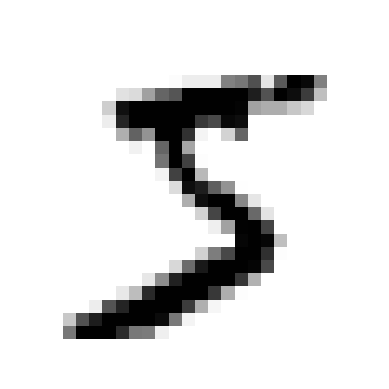

In [11]:
def plot_digit(image_data, label_data=None):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label_data:
        plt.title(label_data)

plot_digit(X[0])

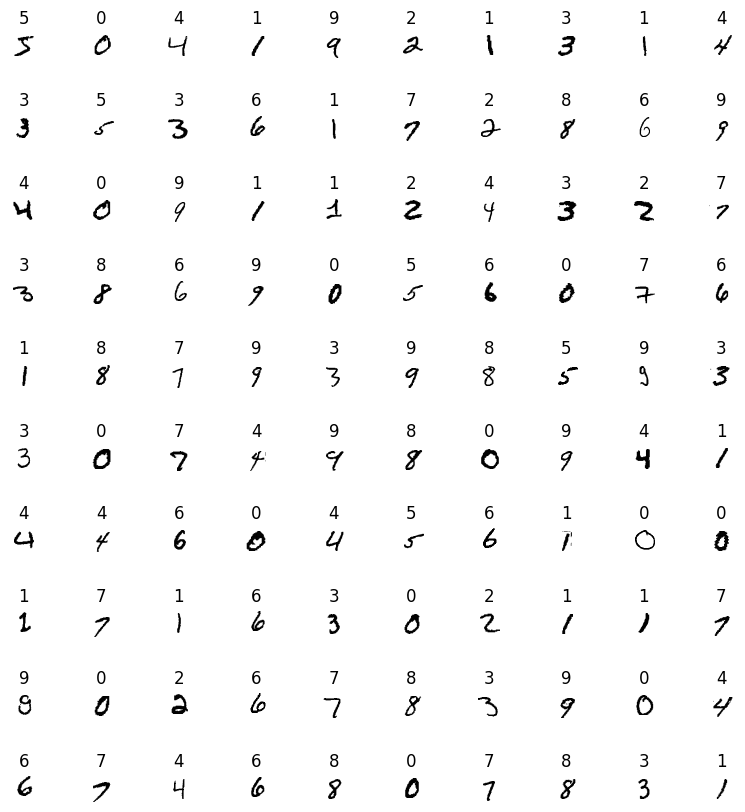

In [12]:
plt.figure(figsize=(10, 10))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data, y[idx])
plt.subplots_adjust(wspace=0, hspace=2)

## Train/Test Split

- the MNIST data returned by `fetch_openml()` is already split for us
    - the first 60000 rows are the train set
    - the last 10000 rows are the test set
    - some learning algorithms are sensitive to the order of the training instances
        - the training set is already split and shuffled for us (not always the case for datasets returned by `fetch_openml()`
        - shuffling is not always a good idea (example: time series data)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

- We simplify the problem by turning it into a "5" detector, which is a binary classification problem

In [15]:
y_train_is_5 = (y_train == '5')
y_test_is_5 = (y_test == '5')

In [18]:
y_train_is_5, y_test_is_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

### `SGDClassifier()`

- stochastic gradient descent classifier
- capable of handling very large datasets efficiently
    - in part because SGD deals with training instances independently, one at a time, so it is well suited for online learning

In [20]:
# from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf

SGDClassifier(random_state=42)

In [22]:
sgd_clf.fit(X_train, y_train_is_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf.predict(X_train[[0]],), y_train_is_5[0]

(array([ True]), True)

## Performance Measures

### Measuring Accuracy Using Cross-Validation

#### `cross_val_score`

Signature:

```python
cross_val_score(estimator,
                X,
                y=None,
                *,
                groups=None, scoring=None,
                cv=None,
                n_jobs=None,
                verbose=0, fit_params=None, pre_dispatch='2*n_jobs',error_score=nan)
```

In [33]:
# from sklearn.model_selection import cross_val_score

# by default, there is no shuffling, so the splits
#. will be the same across calls
cross_val_score(sgd_clf,
                X_train,
                y_train_is_5,
                cv=3,
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Those seem like a good scores, all over 95%, but the target is imbalanced.

In [35]:
pd.Series(y_train_is_5).value_counts(normalize=True)

,proportion
False,0.90965
True,0.09035


It is a good idea to try it with `DummyClassifier`, which, with the default settings, just classifies each images as being in the most frequent class.

In [39]:
# from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf

DummyClassifier()

In [41]:
dummy_clf.fit(X_train, y_train_is_5)

DummyClassifier()

In [45]:
any(dummy_clf.predict(X_train))

False

In [46]:
cross_val_score(dummy_clf,
                X_train,
                y_train_is_5,
                cv=3,
                scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

The fact that we got over 90% accuracy with the Dummy Classifier demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially with *skewed datasets*. A much better way to evaluate the performce of a classifier is to look at the **confusion matrix (CM)**.

##### Implementing Cross-Validation

- for when you need more control over the cross-validation process
- the following code does roughly the same thing as `cross_val_score()`
- `StratifiedKFold` provides train/test indices to split the data into train/test sets
    - it is a variation of `KFold` that returns stratified folds
    - the folds are made by preserving the percentage of samples for each class

In [49]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if needed
skfolds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [58]:
test = skfolds.split(X_train, y_train_is_5)
test

<generator object _BaseKFold.split at 0x7cc297968740>

In [59]:
test = list(test)
len(test)

3

In [64]:
len(test[0])

2

In [68]:
len(test[0][0]), test[0][0]

(40000, array([19964, 19965, 19966, ..., 59997, 59998, 59999]))

In [71]:
len(test[0][1]), test[0][1]

(20000, array([    0,     1,     2, ..., 20331, 20342, 20359]))

In [72]:
X_train.shape, y_train_is_5.shape, 40000 + 20000

((60000, 784), (60000,), 60000)

In [87]:
for train_indices, test_indices in skfolds.split(X_train, y_train_is_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train_is_5[train_indices]
    X_test_fold = X_train[test_indices]
    y_test_fold = y_train_is_5[test_indices]
    print(X_train_fold.shape, y_train_fold.shape, X_test_fold.shape, y_test_fold.shape)

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

(40000, 784) (40000,) (20000, 784) (20000,)
0.95035
(40000, 784) (40000,) (20000, 784) (20000,)
0.96035
(40000, 784) (40000,) (20000, 784) (20000,)
0.9604


In [88]:
# compare the accuracy scores above with cross_val_score
cross_val_score(sgd_clf,
                X_train,
                y_train_is_5,
                cv=3,
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### `cross_val_predict`

- like `cross_val_score()`, `cross_val_predict()` performs k-fold cross-validation, but instead of returning scores, it returns the predictions made on each test fold
- that means you get a "clean" prediction for each instance in the training set ("clean": means "out-of-sample": the model makes predictions on data that it has never seen before

In [90]:
# from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf,
                                    X_train,
                                    y_train_is_5,
                                    cv=3)

y_train_predict.shape, y_train_predict

((60000,), array([ True, False, False, ...,  True, False, False]))

In [95]:
first_fold = y_train_predict[:20000]
(first_fold == y_train_is_5[:20000]).sum() / len(first_fold)

0.95125

In [96]:
the_accuracy = sum(y_train_is_5 == y_train_predict) / len(y_train_predict)
the_accuracy

0.9570333333333333

### Confusion Matrices

- Each row in a confusion matrix represents an **actual class**
- Each column represents a **predicted class**